In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as KL
import matplotlib.pyplot as plt

from dnn.koopman.model import LCINDyTrain
from dnn.utils.mem import set_memory_growth
set_memory_growth()

In [2]:
lcindy = LCINDyTrain(2, 1)
model = lcindy.build()
model.load_weights('/sessions/control/koopman/pendulum/sess_2020-12-10_18-07-34/30000-0.04357.h5')

In [3]:
train_data = np.load('/data/control/pendulum/train.npy')
val_data = np.load('/data/control/pendulum/val.npy')

In [4]:
STEPS = 1000
val_sample_state = val_data["state"][:STEPS + 1]
val_sample_control = val_data["control"][:STEPS + 1]
z_bz = lcindy.multi_loss.state_auto_encoder.encoder(val_sample_state)
v_bv = lcindy.multi_loss.control_auto_encoder.encoder(val_sample_control)

A = lcindy.multi_loss.A.numpy()
B = lcindy.multi_loss.B.numpy()

# Prediction without correction

In [30]:
z_acc_1z = z_bz[:1, :].numpy()
x_bx = np.zeros((STEPS, val_data["state"].shape[1]))
for i in range(STEPS):
    if i % 50 == 0:
        #z_acc_1z = z_bz[i:i+1, :].numpy()
        pass
    x_bx[i] = lcindy.multi_loss.state_auto_encoder.decoder(z_acc_1z).numpy()[0]
    v_1v = v_bv[i:i+1, :].numpy()
    z_acc_1z += 1e-3 * (z_acc_1z @ A + v_1v @ B)

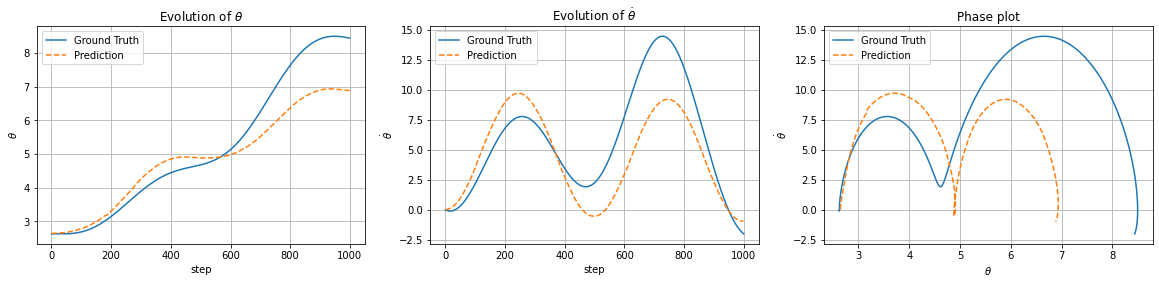

In [31]:
plt.figure(figsize=(20,4))

# theta
plt.subplot(131)
plt.plot(val_sample_state[:, 0], label="Ground Truth")
plt.plot(x_bx[:, 0], '--', label="Prediction")
plt.title("Evolution of $\\theta$")
plt.xlabel("step")
plt.ylabel("$\\theta$")
plt.grid()
plt.legend()

# theta dot
plt.subplot(132)
plt.plot(val_sample_state[:, 1], label="Ground Truth")
plt.plot(x_bx[:, 1], '--', label="Prediction")
plt.title("Evolution of $\\dot{\\theta}$")
plt.xlabel("step")
plt.ylabel("$\\dot{\\theta}$")
plt.grid()
plt.legend()

# phase plot
plt.subplot(133)
plt.plot(val_sample_state[:, 0], val_sample_state[:, 1], label="Ground Truth")
plt.plot(x_bx[:, 0], x_bx[:, 1], '--', label="Prediction")
plt.title("Phase plot")
plt.xlabel("$\\theta$")
plt.ylabel("$\\dot{\\theta}$")
plt.grid()
plt.legend()

plt.savefig('/home/alvin/ece551/project/report/images/koopman_predict.png', dpi=150, bbox_inches='tight')

# Prediction with correction

In [27]:
z_acc_1z = z_bz[:1, :].numpy()
x_bx = np.zeros((STEPS, val_data["state"].shape[1]))
for i in range(STEPS):
    if i % 50 == 0:
        z_acc_1z = z_bz[i:i+1, :].numpy()
        pass
    x_bx[i] = lcindy.multi_loss.state_auto_encoder.decoder(z_acc_1z).numpy()[0]
    v_1v = v_bv[i:i+1, :].numpy()
    z_acc_1z += 1e-3 * (z_acc_1z @ A + v_1v @ B)

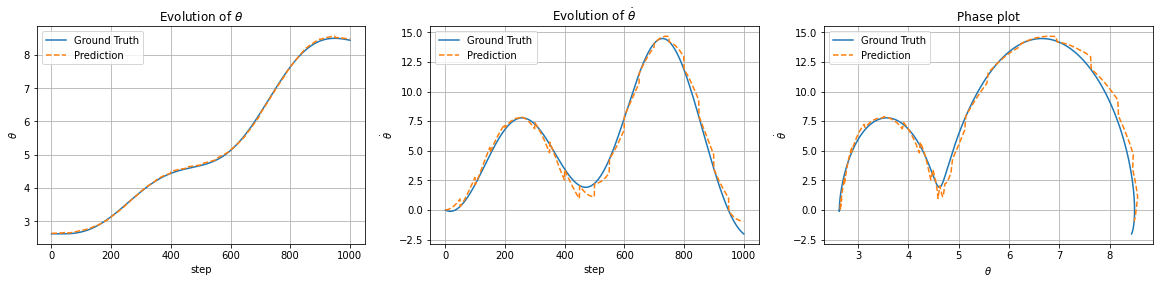

In [29]:
plt.figure(figsize=(20,4))

# theta
plt.subplot(131)
plt.plot(val_sample_state[:, 0], label="Ground Truth")
plt.plot(x_bx[:, 0], '--', label="Prediction")
plt.title("Evolution of $\\theta$")
plt.xlabel("step")
plt.ylabel("$\\theta$")
plt.grid()
plt.legend()

# theta dot
plt.subplot(132)
plt.plot(val_sample_state[:, 1], label="Ground Truth")
plt.plot(x_bx[:, 1], '--', label="Prediction")
plt.title("Evolution of $\\dot{\\theta}$")
plt.xlabel("step")
plt.ylabel("$\\dot{\\theta}$")
plt.grid()
plt.legend()

# phase plot
plt.subplot(133)
plt.plot(val_sample_state[:, 0], val_sample_state[:, 1], label="Ground Truth")
plt.plot(x_bx[:, 0], x_bx[:, 1], '--', label="Prediction")
plt.title("Phase plot")
plt.xlabel("$\\theta$")
plt.ylabel("$\\dot{\\theta}$")
plt.grid()
plt.legend()

plt.savefig('/home/alvin/ece551/project/report/images/koopman_correct.png', dpi=150, bbox_inches='tight')

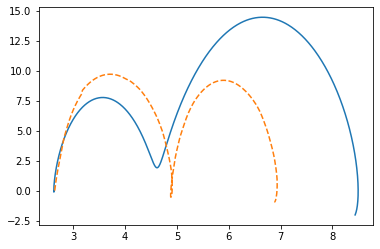

In [8]:
plt.plot(val_sample_state[:, 0], val_sample_state[:, 1])
plt.plot(x_bx[:, 0], x_bx[:, 1], '--')